In [1]:
import pickle 
import numpy as np
import pandas as pd
from skimage import io
import matplotlib.pyplot as plt
from PIL import Image
import cv2 
import os 

In [2]:
os.chdir('5.0')

In [3]:
os.getcwd()

'C:\\Users\\Jalal\\Desktop\\CICIDS2017-FL\\CICIDS2017\\Image data\\Wednesday\\5.0'

In [4]:
# Access all PNG files in directory
allfiles=os.listdir(os.getcwd())
imlist=[filename for filename in allfiles if  filename[-11:] in ["_7_pkts.png"]]
print(len(imlist))

# Assuming all images are the same size, get dimensions of first image
w,h=Image.open(imlist[0]).size
N=len(imlist)

# Create a numpy array of floats to store the average (assume RGB images)
arr=np.zeros((h,w,3),np.float)

# Build up average pixel intensities, casting each image as an array of floats
for im in imlist:
    imarr=np.array(Image.open(im),dtype=np.float)
    arr=arr+imarr/N

# Round values in array and cast as 8-bit integer
arr=np.array(np.round(arr),dtype=np.uint8)

# Generate, save and preview final image
out=Image.fromarray(arr,mode="RGB")
out.save("Average_dos_heartbleed_with_7_fwd_7_bwd_packets.png")
out.show()

924


C:\Users\Jalal\AppData\Local\Temp\ipykernel_14264\70392109.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  arr=np.zeros((h,w,3),np.float)
C:\Users\Jalal\AppData\Local\Temp\ipykernel_14264\70392109.py:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  imarr=np.array(Image.open(im),dtype=np.float)


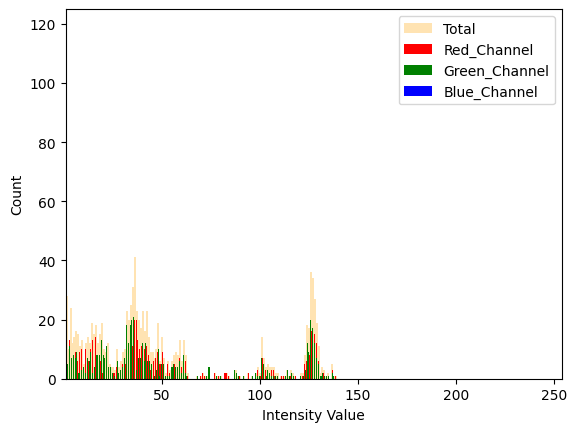

In [5]:
image = io.imread('Average_dos_heartbleed_with_7_fwd_7_bwd_packets.png')

_ = plt.hist(image.ravel(), bins = 256, color = 'orange', alpha = 0.3 )
_ = plt.hist(image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 1)
_ = plt.hist(image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 1)
_ = plt.hist(image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 1)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.xlim(left=1)
plt.xlim(right=254)
plt.ylim((0,125))
plt.show()